In [31]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from pryngles import *
from pryngles import pixx
import time
extension="pixx"
#extension="cpixx"
import multiprocessing as mp
import os,sys,glob

In [35]:
gamma, beta_obs, lamb_obs, lamb_star = Util.calcStartingPosition(30,60,0)

pixx_sys = System()
s=pixx_sys.add(kind="Star",physics=dict(radius=Consts.rsun/pixx_sys.ul),optics=dict(limb_coeffs=[0.65]))
p=pixx_sys.add(kind="Planet", primary=s, 
               radius=Consts.rsaturn/pixx_sys.ul,
               orbit=dict(a=1, e=0.0),
               physics=dict(radius=Consts.rsaturn/pixx_sys.ul),
               optics=dict(nspangles=5000))
r=pixx_sys.add(kind="Ring", primary=p,
               physics=dict(fi=1.5, fe=2.25, i=gamma),
               optics=dict(nspangles=10000))
#fou_gasplanet_optical_50.dat , fou_lambert.dat
RP=pixx_sys.ensamble_system(extension=extension, 
                            fname_planet="./fou_files/Planet/fou_bmsca60.0_asurf1.0.dat",
                            fname_ring="./fou_files/Ring/fou_ring_0_4_0_8_80gaus.dat")
print(RP.physics["extension"])

pixx


In [36]:
lamb_initial = lamb_star
lamb_final = lamb_initial + 360*Consts.deg
lambs = np.linspace(lamb_initial,lamb_final,361)

# Initialise the starting position
RP.changeObserver([lamb_obs,beta_obs])
RP.changeStellarPosition(lamb_initial)
RP._updateGeometricalFactors()
RP._updateIncomingStellarFlux()
RP._updateObservedFacetAreas()
    
Stot  = []
Sp    = []
Sr    = []
Ptot  = []
Pp    = []
Pr    = []
alpha = []

for lamb in lambs:
    RP.changeStellarPosition(lamb)
    print("True anomaly: ", (lamb-lamb_initial)/Consts.deg)
    RP._updateGeometricalFactors()
    RP._updateIncomingStellarFlux()
    RP._updateObservedFacetAreas()
    RP.updateReflection()

    # Save the relevant data
    Stot  += [RP.Stot]
    Sp    += [RP.Stotp]
    Sr    += [RP.Stotr]
    Ptot  += [RP.Ptot]
    Pp    += [RP.Ptotp]
    Pr    += [RP.Ptotr]
    alpha += [np.arccos(RP.alphaps)/Consts.deg]
    
true_anomaly = list((lambs-lamb_initial)/Consts.deg)    
save_dict = {"lambda": true_anomaly, "alpha": alpha, "Stot": Stot,
             "Sp": Sp, "Sr": Sr, "Ptot": Ptot, "Pp": Pp, "Pr": Pr}

# Pickle the data, if file already exists it will be overwritten
with open("/home/allard/Data/Gauss_test/standard_system_80gauss_points_fortran.pkl", "wb") as f:
    pickle.dump(save_dict, f)
    
Stot = np.array(Stot)
Sp = np.array(Sp)
Sr = np.array(Sr)
Ptot = np.array(Ptot)
Pp = np.array(Pp)
Pr = np.array(Pr)

True anomaly:  0.0


NameError: name 'pixx' is not defined

<IPython.core.display.Javascript object>


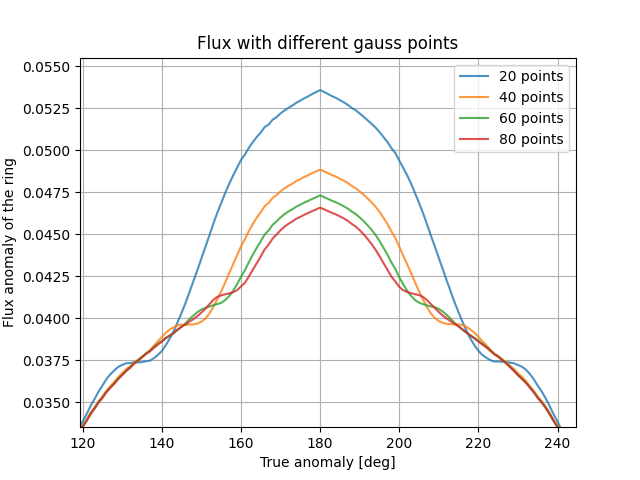

<IPython.core.display.Javascript object>


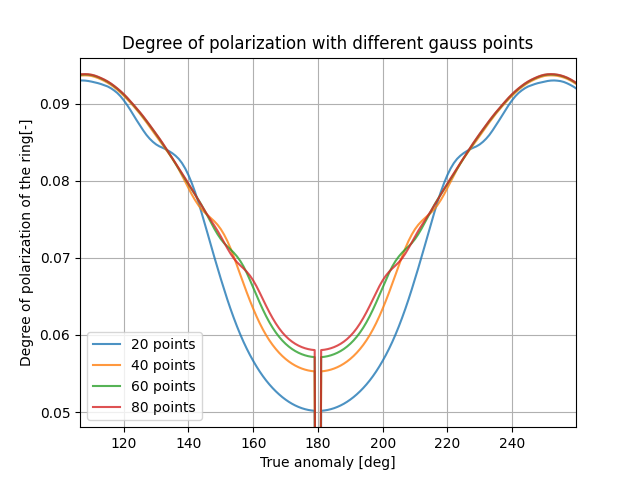

In [28]:
nums = np.array([20,40,60,80])
fig1=plt.figure()
ax1=fig1.gca()

fig2=plt.figure()
ax2=fig2.gca()

for ii,num in enumerate(nums):
    data_name = f"/home/allard/Data/Gauss_test/standard_system_{num}gauss_points.pkl"
    with open(data_name,"rb") as f:
        save_file = pickle.load(f)
        
    true_anomaly = np.array(save_file["lambda"])
    alpha = np.array(save_file["alpha"])
    Stot = np.array(save_file["Stot"])
    Sp = np.array(save_file["Sp"])
    Sr = np.array(save_file["Sr"])
    Ptot = np.array(save_file["Ptot"])
    Pp = np.array(save_file["Pp"])
    Pr = np.array(save_file["Pr"])

    ax1.plot(true_anomaly,Sr[:,0],label=f"{num} points",alpha=0.8)
    ax2.plot(true_anomaly,Pr,label=f"{num} points",alpha=0.8)

ax1.set_xlabel("True anomaly [deg]")
ax1.set_ylabel("Flux anomaly of the ring")
ax1.set_title("Flux with different gauss points")
ax1.legend()
ax1.grid()

ax2.set_xlabel("True anomaly [deg]")
ax2.set_ylabel("Degree of polarization of the ring[-]")
ax2.set_title("Degree of polarization with different gauss points")
ax2.legend()
ax2.grid()
plt.show()

<IPython.core.display.Javascript object>


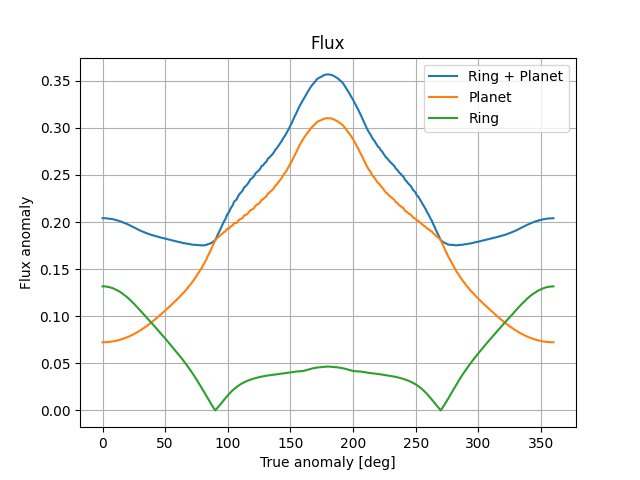

<IPython.core.display.Javascript object>


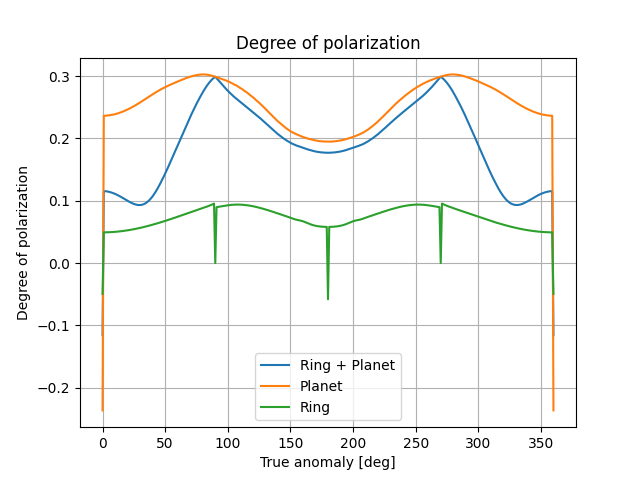

In [29]:
data_name = f"/home/allard/Data/Gauss_test/standard_system_80gauss_points.pkl"
with open(data_name,"rb") as f:
    save_file = pickle.load(f)

true_anomaly = np.array(save_file["lambda"])
alpha = np.array(save_file["alpha"])
Stot = np.array(save_file["Stot"])
Sp = np.array(save_file["Sp"])
Sr = np.array(save_file["Sr"])
Ptot = np.array(save_file["Ptot"])
Pp = np.array(save_file["Pp"])
Pr = np.array(save_file["Pr"])

fig1=plt.figure()
ax1=fig1.gca()
ax1.plot(true_anomaly,Stot[:,0],label="Ring + Planet")
ax1.plot(true_anomaly,Sp[:,0],label="Planet")
ax1.plot(true_anomaly,Sr[:,0],label="Ring")
ax1.set_xlabel("True anomaly [deg]")
ax1.set_ylabel("Flux anomaly")
ax1.set_title("Flux")
ax1.legend()
ax1.grid()
plt.show()

fig1=plt.figure()
ax1=fig1.gca()
ax1.plot(true_anomaly,Ptot,label="Ring + Planet")
ax1.plot(true_anomaly,Pp,label="Planet")
ax1.plot(true_anomaly,Pr,label="Ring")
ax1.set_xlabel("True anomaly [deg]")
ax1.set_ylabel("Degree of polarization")
ax1.set_title("Degree of polarization")
ax1.legend()
ax1.grid()
plt.show()

In [4]:
print("Alpha: ", np.arccos(RP.alphaps)/Consts.deg)
print("Rsaturn: ", Consts.rsaturn)
print("Rsaturn/norm: ", Consts.rsaturn/pixx_sys.ul)
print("Rsun: ", Consts.rsun)
print("Rsun/norm: ", Consts.rsun/pixx_sys.ul)

print("")

print("Rplanet: ", RP.Rplanet)
print("Rstar: ", RP.Rstar)
print("Rp/Rs: ", Consts.rsaturn/Consts.rsun)
print("Rp: ", RP.Rp)

print("")

print("Norm p: ", RP.normp)
print("Afp : ", RP.afp)
print("Sum coshpi: ", np.sum(RP.zetaps[RP.rps_obs[:,2] >= 0]))
print("Afp*normp : ", RP.afp*RP.normp)
print("Ap/Np : ", 4*np.pi*RP.Rp**2/RP.Np)
print("Total area planet: ", 4*np.pi*RP.Rp**2)
print("Total area spangles: ", RP.Np*RP.afp*RP.normp)
print("Np: ", RP.Np)
print("Ncond: ", len(RP.zetaps[RP.rps_obs[:,2] > 0]))
print("Ncond/sum(coshpi): ", len(RP.zetaps[RP.rps_obs[:,2] > 0])/np.sum(RP.zetaps[RP.rps_obs[:,2] >= 0]))
print("Sum (mu, mu0)", np.sum(abs(RP.zetaps[RP.rps_obs[:,2] >= 0])*abs(RP.etaps[RP.rps_obs[:,2] >= 0])*RP.normp*RP.afp)/(np.pi*RP.Rp**2))

Alpha:  90.0000001836389
Rsaturn:  60268000.0
Rsaturn/norm:  0.00040286669668487465
Rsun:  695700000.0
Rsun/norm:  0.004650467260962157

Rplanet:  0.00040286669668487465
Rstar:  0.004650467260962157
Rp/Rs:  0.08662929423602127
Rp:  0.08662929423602127

Norm p:  0.3358049709144363
Afp :  2.8083509717210126e-05
Sum coshpi:  2500.0052573774046
Afp*normp :  9.430582163763036e-06
Ap/Np :  9.430601995814866e-06
Total area planet:  0.09430601995814866
Total area spangles:  0.09430582163763035
Np:  10000
Ncond:  5001
Ncond/sum(coshpi):  2.0003957932657426
Sum (mu, mu0) 0.4244143609875415


In [5]:
cond = RP.rps_obs[:,2] >= 0
result = RP.SCp.calculate_stokes(RP.phidiffps[cond],RP.betaps[cond],
                                 abs(RP.etaps[cond]),abs(RP.zetaps[cond]),
                                 np.ones(cond.sum())*RP.normp*RP.afp
                                )
flux = result[:,:-1]
print(np.sum(flux,axis=0)/(np.pi*RP.Rp**2))

[ 3.90953552e-01  5.91377754e-02 -1.11819886e-08]
